In [1]:
import pickle
import pandas as pd
import re

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report 
from sklearn.decomposition import NMF,LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
us = pickle.load(open("wikivoyage_text_US.p","rb"))

In [4]:
df = pd.DataFrame.from_dict(us,orient='index')

In [5]:
df = df.reset_index()

df = df.rename(columns=({ 'index' : 'Name'}))

df.head()


,Name,text,type,loc
0,AbercrombiePAGE,{{pagebanner|Abercrombie WikiVoyage Banner ND....,page,//tools.wmflabs.org/wikivoyage/w/poimap2.php?l...
1,Aberdeen (Maryland)PAGE,{{pagebanner|Aberdeen MD WikiVoyage Banner.jpg...,page,//tools.wmflabs.org/wikivoyage/w/poimap2.php?l...
2,Aberdeen (South Dakota)PAGE,{{pagebanner|Pagebanner default.jpg|pgname=Abe...,page,//tools.wmflabs.org/wikivoyage/w/poimap2.php?l...
3,Aberdeen (Washington)PAGE,{{Pagebanner|pgname=Aberdeen |Wikivoyage page ...,page,//tools.wmflabs.org/wikivoyage/w/poimap2.php?l...
4,AbernathyPAGE,{{pagebanner|Abernathy Texas Wikivoyage Banner...,page,//tools.wmflabs.org/wikivoyage/w/poimap2.php?l...


In [6]:
def unwiki(wiki):
        """
       Remove wiki markup from the text.
       """
        wiki = re.sub(r'(?i)\{\{IPA(\-[^\|\{\}]+)*?\|([^\|\{\}]+)(\|[^\{\}]+)*?\}\}', lambda m: m.group(2), wiki)
        wiki = re.sub(r'(?i)\{\{Lang(\-[^\|\{\}]+)*?\|([^\|\{\}]+)(\|[^\{\}]+)*?\}\}', lambda m: m.group(2), wiki)
        wiki = re.sub(r'\{\{[^\{\}]+\}\}', '', wiki)
        wiki = re.sub(r'(?m)\{\{[^\{\}]+\}\}', '', wiki)
        wiki = re.sub(r'(?m)\{\|[^\{\}]*?\|\}', '', wiki)
        wiki = re.sub(r'(?i)\[\[Category:[^\[\]]*?\]\]', '', wiki)
        wiki = re.sub(r'(?i)\[\[Image:[^\[\]]*?\]\]', '', wiki)
        wiki = re.sub(r'(?i)\[\[File:[^\[\]]*?\]\]', '', wiki)
        wiki = re.sub(r'\[\[[^\[\]]*?\|([^\[\]]*?)\]\]', lambda m: m.group(1), wiki)
        wiki = re.sub(r'\[\[([^\[\]]+?)\]\]', lambda m: m.group(1), wiki)
        wiki = re.sub(r'\[\[([^\[\]]+?)\]\]', '', wiki)
        wiki = re.sub(r'(?i)File:[^\[\]]*?', '', wiki)
        wiki = re.sub(r'\[[^\[\]]*? ([^\[\]]*?)\]', lambda m: m.group(1), wiki)
        wiki = re.sub(r"''+", '', wiki)
        wiki = re.sub(r'(?m)^\*$', '', wiki)
       
        return wiki

def unhtml(html):
        """
       Remove HTML from the text.
       """
        html = re.sub(r'(?i)&nbsp;', ' ', html)
        html = re.sub(r'(?i)<br[ \\]*?>', '\n', html)
        html = re.sub(r'(?m)<!--.*?--\s*>', '', html)
        html = re.sub(r'(?i)<ref[^>]*>[^>]*<\/ ?ref>', '', html)
        html = re.sub(r'(?m)<.*?>', '', html)
        html = re.sub(r'(?i)&amp;', '&', html)
       
        return html

def f(x):
    return unhtml(unwiki(x))

In [7]:
df['text'] = df['text'].apply(f)

In [8]:
pages = df[df['type'] == 'page']

In [9]:
def f(x):
    return re.sub('PAGE', '', x)

In [10]:
pages['Name'] = pages['Name'].apply(f)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
pages = pages[pages['loc'].str.contains("//tools.wmflabs.org/wikivoyage/w/poimap2")==True]

In [12]:
from nltk.corpus import stopwords


# In[19]:

StopWords = stopwords.words('english')

In [13]:
StopPlaces = list(pages['Name'])


# In[21]:

StopPlaces = map(lambda x: re.sub("\(|\)", '',x), StopPlaces)


# In[22]:

StopPlaces = map(lambda x: x.lower().split(), StopPlaces)


# In[23]:

StopPlaces = [item for sublist in StopPlaces for item in sublist]

StopPlaces = [re.findall(r'(?<=\/).*',i)[0] if "/" in i else i for i in StopPlaces]
# In[24]:

StopWords = StopPlaces + StopWords


# In[25]:

StopWords = list(set(StopWords))

In [14]:
def f(x):
    x = re.sub(r'WikiPedia:([\s\S]*)','', x)
    x = re.sub(r'Dmoz:([\s\S]*)','', x)
    x = re.sub(r'\[([\s\S]*)\]','', x)
    x = re.sub(r'[0-9]','', x)
    #x = re.sub(r'\=\=Get in\=\=([\s\S]*)(?=\=\=Get around\=\=)','',x)
    #x = re.sub(r'\=\=Get around\=\=([\s\S]*)(?=\=\=See\=\=)','',x)
    #x = re.sub(r'\=\=Respect\=\=([\s\S]*)(?=\=\=Go next\=\=)','',x)
    #x = re.sub(r'\=\=Stay safe\=\=([\s\S]*)(?=\=\=Go next\=\=)','',x)
    x = re.sub(r'\=\=([\S ]*)\=\=', '', x)
    x = re.sub(r'\=\=Go next\=\=([\s\S]*)','', x)
    return x

In [15]:
pages['regex_text'] = pages['text'].apply(f)

In [16]:
pages2 = pages

In [17]:
pages4 = pages2

In [18]:
for name in pages4["Name"]:
    
    name2 = name + "/"
    df = pages4[pages4["Name"].str.contains(name2) == True]
    
    if len(df) > 0:
        for i in df["regex_text"]:
            pages2[pages2["Name"] == name]["regex_text"] = pages2[pages2["Name"] == name]["regex_text"] + i
            
    pages2 = pages2.drop(df.index)

//anaconda/lib/python2.7/site-packages/pandas/core/strings.py:207: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  " groups, use str.extract.", UserWarning)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
pages2['len'] = map(lambda x: len(x), pages2['regex_text'])

In [20]:
pages2 = pages2[pages2['len']> 1000]

In [21]:
from gensim.models.doc2vec import LabeledSentence

In [22]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield LabeledSentence(words=doc,tags=[self.labels_list[idx]])

In [23]:
pages3 = pages2.reset_index()

In [24]:
pages3 = pages3.ix[np.array([i for i,j in enumerate(list(pages2["Name"])) if "Airport" not in j])]

In [25]:
features = list(pages3['regex_text'].apply(lambda x: "".join(x.lower().splitlines())))

In [26]:
from nltk.tokenize import RegexpTokenizer

In [27]:
tokenizer = RegexpTokenizer(r'\w+')

In [28]:
features = [tokenizer.tokenize(x) for x in features]

In [29]:
features = [[y for y in x if y not in StopWords] for x in features]

In [30]:
labels_list = list(pages3['Name'])

In [31]:
it = LabeledLineSentence(features, labels_list)

In [32]:
import gensim

In [105]:
model = gensim.models.Doc2Vec(size=200, window=10,
                              min_count=5, workers=11,alpha=0.025, min_alpha=0.025,negative=20,
                             dm=0,dbow_words=1) # use fixed learning rate

In [106]:
model.build_vocab(it)

In [107]:
for epoch in range(10):
    model.train(it)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca
    model.train(it)

In [108]:
model.save("doc2vec.model")

In [144]:
model.docvecs.most_similar()

TypeError: 'Vocab' object is not iterable

In [68]:
model.most_similar(model.syn0norm[model.vocab['skiing'].index])

TypeError: 'numpy.float32' object is not iterable

In [69]:
model.docvecs.most_similar(model.syn0norm[model.vocab['skiing'].index])

TypeError: 'numpy.float32' object is not iterable

In [67]:
model.vocab['skiing'].index

6726

In [62]:
model.syn0norm[model.vocab['skiing'].index]

array([-0.06245807, -0.01415789,  0.00260839, -0.08011691,  0.01349254,
       -0.02795338, -0.06820396, -0.08473887, -0.04719996,  0.0415777 ,
        0.01524689, -0.03672023, -0.01999385,  0.07882671,  0.08457068,
        0.00673092,  0.05078225, -0.09355281, -0.06450774, -0.00306488,
        0.02049748, -0.10971595, -0.0164858 , -0.10860176,  0.11950722,
        0.01033655, -0.07752786,  0.06293855,  0.05771945,  0.04158242,
        0.00928638,  0.05731043,  0.0215348 , -0.06709696,  0.05062351,
       -0.01140026, -0.07648042, -0.03413121, -0.00977167,  0.04571512,
        0.01914752, -0.00922657,  0.0396229 , -0.05123307, -0.09696598,
        0.04464613, -0.05312309, -0.13987021,  0.04102162, -0.09300322,
       -0.03338017, -0.00024413,  0.08327062, -0.0751948 ,  0.00154893,
        0.00863051,  0.01798194, -0.09478285,  0.06934574,  0.01267201,
        0.04465583, -0.08891953, -0.00165403, -0.0597673 ,  0.04408976,
       -0.03822423, -0.05616942,  0.05873096, -0.07526834, -0.07

In [543]:
xfeatures = np.array(model.docvecs.doctag_syn0norm)

In [544]:
import sklearn

In [545]:
scaler = sklearn.preprocessing.StandardScaler(with_mean=False)

In [546]:
xfeatures = model.docvecs.doctag_syn0.astype(np.float)

In [547]:
model.docvecs.doctag_syn0.astype(np.float)

array([[ 0.00618221,  0.14849949, -0.21436004, ...,  0.05242248,
        -0.29331636, -0.07001676],
       [-0.08529968,  0.04382144, -0.12490274, ...,  0.14418064,
        -0.01959139, -0.04958922],
       [-0.01886769,  0.03903722,  0.19335651, ...,  0.00457531,
        -0.05352483, -0.06246015],
       ..., 
       [ 0.05247582, -0.07905624,  0.02315853, ..., -0.09176812,
         0.00245069, -0.11172249],
       [-0.09852564,  0.03295929, -0.19023257, ...,  0.06347469,
        -0.02566116,  0.04252853],
       [ 0.0968906 , -0.3269906 , -0.21318677, ...,  0.04024683,
        -0.20773768,  0.02693229]])

In [127]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10,metric='cosine')
cluster_labels = clusterer.fit_predict(model.docvecs.doctag_syn0.astype(np.float))

In [549]:
md = DBSCAN(eps=1)

In [550]:
md.fit(model.docvecs.doctag_syn0.astype(np.float))

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)

In [379]:
md.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
from collections import Counter

In [128]:
Counter(cluster_labels)

Counter({-1: 2659, 0: 28, 1: 25, 2: 18, 3: 34, 4: 28})

In [84]:
import sklearn

In [129]:
pca = sklearn.decomposition.RandomizedPCA()

In [130]:
pca_x = pca.fit_transform(model.docvecs.doctag_syn0.astype(np.float))

In [131]:
pca.explained_variance_[0:10]

array([ 0.5262375 ,  0.46992238,  0.41535437,  0.40188575,  0.35447076,
        0.34057881,  0.31949515,  0.31634743,  0.30805046,  0.29567861])

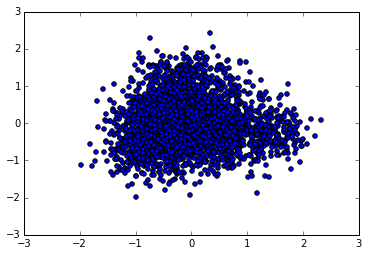

In [132]:
plt.scatter(pca_x[:,0],pca_x[:,1])

In [304]:
import time

In [306]:
from sklearn.cluster import KMeans

In [333]:
from sklearn import mixture

In [337]:
start = time.time()
doc_vectors = model.docvecs.doctag_syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids
print "Running K means"
g = mixture.GMM(n_components=10)
#kmeans_clustering = g()
g.fit( doc_vectors )
idx = g.predict(doc_vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."


# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number
word_centroid_map = dict(zip( model.docvecs.index2doctag, idx ))

# Print the first ten clusters
for cluster in xrange(0,10):
    #
    # Print the cluster number
    print "\nCluster %d" % cluster
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if( word_centroid_map.values()[i] == cluster ):
            words.append(word_centroid_map.keys()[i])
    print words

Running K means
Time taken for K Means clustering:  4.00965094566 seconds.

Cluster 0
[u'Ozark National Scenic Riverways', u'Ross County', u'Chesapeake and Ohio Canal National Historical Park', u'Clayton (New Mexico)', u'Sun Lakes-Dry Falls State Park', u'Big South Fork National Recreation Area', u'Canaveral National Seashore', u'Gustavus', u'Fire Island National Seashore', u'Delaware Water Gap National Recreation Area', u'Cuyahoga Valley National Park', u'Cahokia Mounds State Historic Site', u'Glen Canyon National Recreation Area', u'Apalachicola National Forest', u'Mammoth Spring (Arkansas)', u'Land Between the Lakes National Recreation Area', u'Ocala National Forest', u'Big Bend (California)', u'Boundary Waters', u'Kentucky Dam Village State Resort Park', u'Cumberland Gap National Historical Park', u'Cape Cod National Seashore', u'Brown County State Park', u'Cooke City', u'Little Missouri National Grasslands', u'Lake County (Florida)', u'City of Rocks National Reserve', u'Mountain V

In [161]:
model.docvecs.most_similar([model['hiking']])

[(u'Yuba Lake State Park', 0.3783954381942749),
 (u'Pacifica', 0.37636709213256836),
 (u'Big Bend National Park', 0.36519914865493774),
 (u'The Colony', 0.35714513063430786),
 (u'South Bay', 0.3537178635597229),
 (u'Lubec', 0.34564393758773804),
 (u'Little Missouri National Grasslands', 0.34557855129241943),
 (u'Torrey', 0.342734158039093),
 (u'Peninsula (Bay Area)', 0.33998537063598633),
 (u"Utah's Dixie", 0.33856016397476196)]

In [136]:
model.most_similar([model.docvecs['Metro Detroit']])

[(u'insignia', 0.5012222528457642),
 (u'greektown', 0.38461387157440186),
 (u'dine', 0.3843832015991211),
 (u'westin', 0.37954944372177124),
 (u'renaissance', 0.36343830823898315),
 (u'cranbrook', 0.3550088405609131),
 (u'omni', 0.3210248053073883),
 (u'imax', 0.3143271207809448),
 (u'mover', 0.31117814779281616),
 (u'atop', 0.3082394003868103)]

In [173]:
from __future__ import print_function
from sklearn import mixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from k_medoids_ import KMedoids

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.

range_n_clusters = xrange(2,50)
silscores_km = []
silscores_gmm = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(model.docvecs.doctag_syn0) + (n_clusters + 1) * 10])
    g = mixture.GMM(n_components=10)
    #kmeans_clustering = g()
    g.fit( model.docvecs.doctag_syn0 )
    idx = g.predict(model.docvecs.doctag_syn0)
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10,distance_metric='cosine')
    cluster_labels = clusterer.fit_predict(model.docvecs.doctag_syn0)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(model.docvecs.doctag_syn0,cluster_labels,metric='cosine')
    silscores_km.append(silhouette_avg)
    print("K-medoid: For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    
    silhouette_avg = silhouette_score(model.docvecs.doctag_syn0,idx,metric='cosine')
    silscores_gmm.append(silhouette_avg)
    print("GMM: For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) 

K-medoid: For n_clusters = 2 The average silhouette_score is : 0.00735783
GMM: For n_clusters = 2 The average silhouette_score is : 0.00626427
K-medoid: For n_clusters = 3 The average silhouette_score is : 0.00631849
GMM: For n_clusters = 3 The average silhouette_score is : 0.00598935
K-medoid: For n_clusters = 4 The average silhouette_score is : 0.00556081
GMM: For n_clusters = 4 The average silhouette_score is : 0.00713934
K-medoid: For n_clusters = 5 The average silhouette_score is : 0.00519423
GMM: For n_clusters = 5 The average silhouette_score is : 0.00306809
K-medoid: For n_clusters = 6 The average silhouette_score is : 0.00435073
GMM: For n_clusters = 6 The average silhouette_score is : 0.00165628
K-medoid: For n_clusters = 7 The average silhouette_score is : 0.00385237
GMM: For n_clusters = 7 The average silhouette_score is : -0.0193197136913
K-medoid: For n_clusters = 8 The average silhouette_score is : 0.00347365
GMM: For n_clusters = 8 The average silhouette_score is : -0.0

<function matplotlib.pyplot.show>

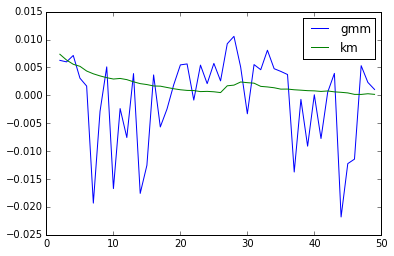

In [174]:
plt.plot(range_n_clusters,silscores_gmm,label="gmm")
plt.plot(range_n_clusters,silscores_km,label="km")
plt.legend()
plt.show

In [175]:
max(silscores_gmm)

0.01056572

In [176]:
silscores_gmm.index(max(silscores_gmm))

26

In [177]:
range_n_clusters[26]

28

In [178]:
g = mixture.GMM(n_components=28)
#kmeans_clustering = g()
g.fit( model.docvecs.doctag_syn0 )
idx = g.predict(model.docvecs.doctag_syn0)

In [182]:
import time

In [184]:
start = time.time()
doc_vectors = model.docvecs.doctag_syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids
print("Running GMM")
g = mixture.GMM(n_components=28)
#kmeans_clustering = g()
g.fit( doc_vectors )
idx = g.predict(doc_vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")


# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number
word_centroid_map = dict(zip( model.docvecs.index2doctag, idx ))

# Print the first ten clusters
for cluster in xrange(0,28):
    #
    # Print the cluster number
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if( word_centroid_map.values()[i] == cluster ):
            words.append(word_centroid_map.keys()[i])
    print(words)

Running GMM
Time taken for K Means clustering:  9.09312105179 seconds.

Cluster 0
[u'Grand Haven', u'River Vale', u'Woodstock (Connecticut)', u'Rio Grande Valley', u'Seaside Heights', u'Wisconsin Dells', u'Danbury', u'North Brunswick', u'Quakertown', u'Abington Township', u'Fond du Lac', u'Sioux Falls', u'Bethel (Alaska)', u'Bergen County', u'Charlottesville', u'Palos Verdes', u'Branford', u'Superior', u'Aspen', u'New Milford', u'Delaware (Ohio)', u'Manteo', u'Rockville', u'Ocean City (New Jersey)', u'New Hope', u'Rockville Centre', u'Alabama', u'Largo (Maryland)', u'Corpus Christi', u'Claymont', u'Hamden', u'East Greenwich', u'Palm Springs', u'Tampa', u'Harrisburg', u'Camden (Delaware)', u'Walker (Minnesota)', u'Griffin', u'Mount Desert Island', u'Marina del Rey', u'Flint', u'Piedmont (North Carolina)', u'Big Bear Lake', u'Richmond', u'Fresno', u'Franklin (Michigan)', u'Naperville', u'Longmeadow', u'Celebration', u'Stoughton (Massachusetts)', u'Worcester (Massachusetts)', u'Bluefield 

In [191]:
for cluster in xrange(0,28):
    #
    # Print the cluster number
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if( word_centroid_map.values()[i] == cluster ):
            words.append(model.docvecs[word_centroid_map.keys()[i]])
            
            
    print(model.most_similar(words))


Cluster 0
[(u'menu', 0.5720971822738647), (u'delicious', 0.5710393190383911), (u'restaurant', 0.5624308586120605), (u'lunch', 0.5568984150886536), (u'atmosphere', 0.5358323454856873), (u'breakfast', 0.5322791337966919), (u'variety', 0.52189040184021), (u'selection', 0.5217148065567017), (u'sandwiches', 0.5205617547035217), (u'gourmet', 0.5198789238929749)]

Cluster 1
[(u'ranked', 0.4021759033203125), (u'magazine', 0.3552449941635132), (u'miracle', 0.3487483561038971), (u'primetime', 0.345687597990036), (u'personality', 0.33944496512413025), (u'_florida', 0.33841365575790405), (u'westin', 0.3239818215370178), (u'jacuzzi', 0.3158218264579773), (u'indoor', 0.31304097175598145), (u'rated', 0.3111187815666199)]

Cluster 2
[(u'neighborhoods', 0.5106140971183777), (u'iselin', 0.4820122718811035), (u'dodgy', 0.4748816192150116), (u'jerseycommons', 0.46724969148635864), (u'neighboring', 0.45965832471847534), (u'crime', 0.451408714056015), (u'muggings', 0.44978398084640503), (u'nj', 0.447563886